# TODO Numerical Integration with a fragility curve

In this example, we will demonstrate how to calculate the failure probability of a levee using a fragility curve. Fragility curve is a function that describes the relation between the load imposed on the levee and the corresponding  (conditional) failure probability. Typically hence a fragility curve is the following relation: $h$ -> $P(Z<0|h)$. By integrating the fragility curve with the load statistics, the failure probability can be estimated. The goal hence is to derive the following probability: $P(Z<0) = \int P(Z<0 | h)\cdot f(h) dh$.

First, let's import the necessary packages:

In [52]:
from ptk import *
from scipy import interpolate
import matplotlib.pyplot as plt

We consider the following fragility curve $h$ --> $P(Z<0|h)$:

Text(0, 0.5, 'Pf')

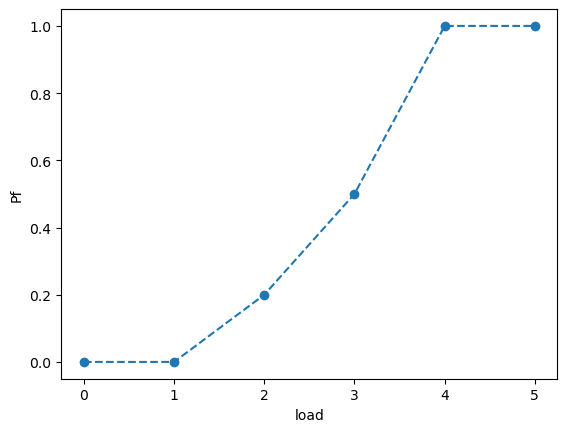

In [53]:
fc = {"h": [0,1,2,3,4,5], "Pf": [0.0,0.0,0.2,0.5,1.0,1.0]}

plt.plot(fc["h"], fc["Pf"], 'o--')
plt.xlabel("load")
plt.ylabel("Pf")

And we define the following limit state function. The function returns value $0$ or $1$ depending on the value of the load $h$ and the value of the standard normal variable $U$. Inside the limit state function, a discret random variable is defined which takes value $0$ with the probability $P(Z<0|h)$ and value $1$ with the probability $1-P(Z<0|h)$.

In [54]:
def limit_state_function(h, U):

    fc = {"h": [0,1,2,3,4,5], "Pf": [0.0,0.0,0.2,0.5,1.0,1.0]}

    f = interpolate.interp1d(fc["h"], fc["Pf"], fill_value=('extrapolate'))

    stochast = Stochast()
    stochast.distribution = "discrete"
    val = [0.0, 1.0]
    amount = [float(f(h)), 1.0-float(f(h))]
    
    for i in range(0, len(val)):
        dv = DiscreteValue()
        dv.x = val[i]
        dv.amount = amount[i]
        stochast.discrete_values.append(dv)

    return stochast.get_x_from_u(U)

To perform a reliability analysis, we create a reliability project and specify the limit state function (model):

In [55]:
project = ReliabilityProject()
project.model = limit_state_function

In [56]:
project.variables["U"].distribution = "normal"
project.variables["U"].mean = 0.0
project.variables["U"].deviation = 1.0

project.variables["h"].distribution = "log_normal"
project.variables["h"].mean = 1.0
project.variables["h"].deviation = 0.1

We perform reliability calculations with `FORM` for different values of $w$.

In [57]:
project.settings.reliability_method = "form"
project.run()
beta = project.design_point.reliability_index

print(beta)

74.71921831230577
